# Analysis the data in the file : IndianFood

In [17]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as ss

In [2]:
# Importing dataset in Python
data=pd.read_csv("indian_food.csv")

# General Data Analysis

In [3]:
# First 5 entries of the dataset
data.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
# Last 5 entries of the dataset
data.tail(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [5]:
# Count of data based on the course of food
data["course"].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [6]:
# Shape of the excel file in format (Rows,Columns)
data.shape

(255, 9)

In [7]:
# Count the number of observations in each column (excluding missing observation)
data.count()

name              255
ingredients       255
diet              255
prep_time         255
cook_time         255
flavor_profile    255
course            255
state             255
region            254
dtype: int64

In [8]:
# Count the number of observation for particular column in dataset
data.name.count()

255

In [9]:
# Find count of null values in each column
data.isnull().sum() 

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

# Statistics on Data

In [10]:
# Finding cumulative cooking time for all the dishes in dataset
data.prep_time.cumsum() 

0        45
1       125
2       140
3       155
4       170
       ... 
250    7894
251    7914
252    7913
253    7933
254    7932
Name: prep_time, Length: 255, dtype: int64

In [11]:
# Mean of the numerical columns in data set
data.mean()

prep_time    31.105882
cook_time    34.529412
dtype: float64

In [12]:
# Mean of individual column in dataset
data.prep_time.mean()

31.105882352941176

In [13]:
# Median of column in dataset
data.prep_time.median()

10.0

In [14]:
# Mode of column in dataset
data.cook_time.mode()

0    30
dtype: int64

In [18]:
# Geometric Mean of dataset column
data1=data['prep_time'].dropna()
ss.gmean(data1)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:402: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


nan

In [19]:
# Provide summary statistics for numeric data only
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [20]:
# Display count based on the column selection
data["diet"].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [21]:
# Display count based on the column selection
data["flavor_profile"].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

# Data Classification

In [22]:
# One way classification according to column specified (count)
data.groupby(['course']).count()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,state,region
course,,,,,,,,
dessert,85,85,85,85,85,85,85,84
main course,129,129,129,129,129,129,129,129
snack,39,39,39,39,39,39,39,39
starter,2,2,2,2,2,2,2,2


In [23]:
# One way classification according to column specified (mean)
data.groupby(['course']).mean()

,prep_time,cook_time
course,,
dessert,27.047059,43.929412
main course,25.162791,29.930233
snack,51.974359,29.102564
starter,180.000000,37.500000


In [24]:
# One way classification based on the column and gives respective count
data.groupby(['course']).sum()

,prep_time,cook_time
course,,
dessert,2299,3734
main course,3246,3861
snack,2027,1135
starter,360,75


In [25]:
# Group data on basis of 1 field and then calculate mean for other
data.groupby(['region'])['prep_time'].mean()

region
-1            16.846154
Central       13.333333
East          37.774194
North         37.224490
North East    14.520000
South         54.169492
West          14.986486
Name: prep_time, dtype: float64

In [26]:
# multi-way classification (count)
data.groupby(['diet', 'region',]).count() 

name  ingredients  prep_time  cook_time  \
diet           region                                                
non vegetarian East           5            5          5          5   
               North          5            5          5          5   
               North East    13           13         13         13   
               South          3            3          3          3   
               West           3            3          3          3   
vegetarian     -1            13           13         13         13   
               Central        3            3          3          3   
               East          26           26         26         26   
               North         44           44         44         44   
               North East    12           12         12         12   
               South         56           56         56         56   
               West          71           71         71         71   

                           flavor_profile  course  state  
diet           region                                     
non vegetarian East                     5       5      5  
               North                    5       5      5  
               North East              13      13     13  
               South                    3       3      3  
               West                     3       3      3  
vegetarian     -1                      13      13     13  
               Central                  3       3      3  
               East                    26      26     26  
               North                   44      44     44  
               North East              12      12     12  
               South                   56      56     56  
               West                    71      71     71

In [27]:
# multi-way classification (mean)
data.groupby(['diet', 'region',]).mean()

prep_time  cook_time
diet           region                           
non vegetarian East          9.800000  30.800000
               North       124.000000  38.000000
               North East    4.461538  11.769231
               South        16.666667  71.666667
               West          2.666667  12.666667
vegetarian     -1           16.846154  21.230769
               Central      13.333333  48.333333
               East         43.153846  38.769231
               North        27.363636  41.454545
               North East   25.416667  17.083333
               South        56.178571  32.339286
               West         15.507042  38.887324

In [28]:
# multi-way classification based on 2 fields and then find mean of 3rd column
data.groupby(['course', 'region'])['cook_time'].mean()

course       region    
dessert      -1            31.000000
             Central       45.000000
             East          42.809524
             North         43.222222
             North East    24.000000
             South         33.333333
             West          63.173913
main course  -1            16.000000
             Central       40.000000
             East          26.300000
             North         40.270270
             North East    10.555556
             South         31.967742
             West          29.392857
snack        -1            14.250000
             Central       60.000000
             North         60.000000
             South         43.500000
             West          22.739130
starter      North         37.500000
Name: cook_time, dtype: float64

# Graphs

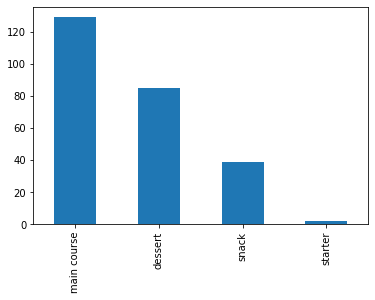

In [29]:
# Bar graph of data based on the course of food
data['course'].value_counts().plot(kind='bar')

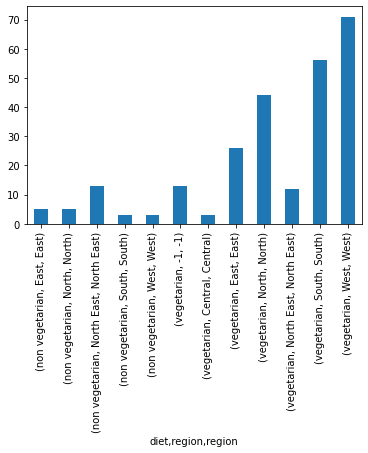

In [63]:
# Grouping data based on diet and then region
data1=data.groupby(['diet', 'region'])
data1['region'].value_counts().plot(kind='bar')
plt.show()

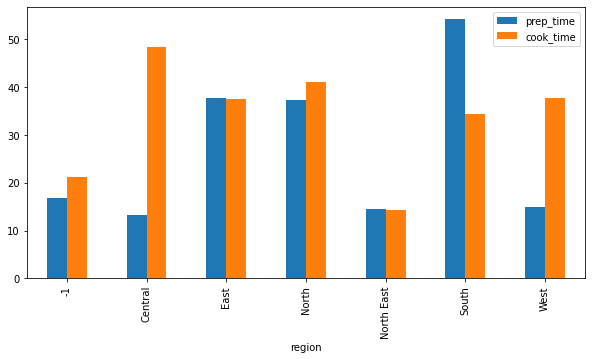

In [37]:
# Classify data based on region and give prep and cook time graph
Y=data.groupby(['region']).mean()
Y=Y[['prep_time','cook_time']]
Y.plot(kind='bar' , figsize=(10,5))
plt.show()

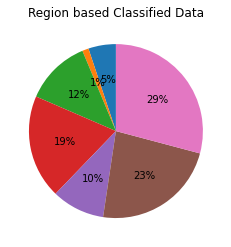

In [61]:
# Region based Classified Data
Y=data.groupby(['region'])['course'].count()
plt.title("Region based Classified Data") 
plt.pie(Y,autopct='%0.0f%%',startangle=90)
plt.show()

# END